In [1]:
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier, KNeighborsRegressor
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_predict

from matplotlib import pyplot as plt
from skimage import img_as_float
from skimage.transform import rescale
import skimage.io as io
from skimage.filters import frangi, sobel, threshold_otsu
from skimage.morphology import erosion, dilation
import numpy as np
import cv2

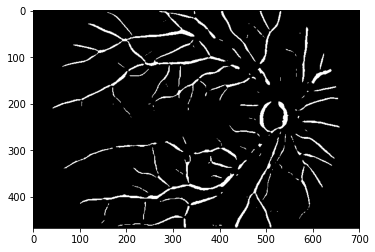

In [2]:
img = img_as_float(io.imread(f'filters/healthy/01_h.jpg'))
img = img[:, :, 1]
img = rescale(img, 0.2, anti_aliasing=False)

iris_data=load_iris()
good = img_as_float(io.imread(f'benchmark.jpg'))[:, :, 1]
i = 0
while i < len(good):
    j = 0
    while j < len(good[i]):
        if good[i][j] > 0.9:
            good[i][j] = 1
        else:
            good[i][j] = 0
        j += 1
    i += 1
plt.imshow(good, cmap="gray")

In [3]:
# def blockshaped(arr, nrows, ncols):
#     h, w = arr.shape
#     new = np.zeros((h - (h % nrows), w - (w % ncols)))
#     i = 0
#     while i < len(new):
#         new[i] = arr[i][:len(arr[i])-(w % ncols)]
#         i += 1
#     h, w = new.shape
#     print(h, w)
#     assert h % nrows == 0, f"{h} rows is not evenly divisible by {nrows}"
#     assert w % ncols == 0, f"{w} cols is not evenly divisible by {ncols}"
#     return (new.reshape(h//nrows, nrows, -1, ncols)
#                .swapaxes(1,2)
#                .reshape(-1, nrows, ncols))

h, w = img.shape
new_img = np.zeros((h - 4, w - 4, 5, 5))
benchmark = np.zeros((h - 4, w - 4))
for i in range(2, h - 4):
    for j in range(2, w - 4):
        benchmark[i - 2][j - 2] = good[i][j]
        new_img[i][j] = [
            [img[i - 2][j - 2], img[i - 2][j - 1], img[i - 2][j], img[i - 2][j + 1], img[i - 2][j + 2]],
            [img[i - 1][j - 2], img[i - 1][j - 1], img[i - 1][j], img[i - 1][j + 1], img[i - 1][j + 2]],
            [img[i][j - 2], img[i][j - 1], img[i][j], img[i][j + 1], img[i][j + 2]],
            [img[i + 1][j - 2], img[i + 1][j - 1], img[i + 1][j], img[i + 1][j + 1], img[i + 1][j + 2]],
            [img[i + 2][j - 2], img[i + 2][j - 1], img[i + 2][j], img[i + 2][j + 1], img[i + 2][j + 2]],
        ]
# print(new_img[0])

# print("before:", img.shape)
# # img = blockshaped(img, 5, 5)
# print("after:", img.shape)
benchmark.shape, new_img.shape

((463, 697), (463, 697, 5, 5))

In [4]:
# iris_data.data

# allHuMoments = []
# allCentralMoments = []
# allVariances = []
main_data = []
for i in new_img:
    cur_row = []
    for j in i:
        this_fragment = []
        moments = cv2.moments(j)
        huMoments = cv2.HuMoments(moments)
        variance = np.var(j)
    #     allHuMoments.append(huMoments)
    #     allCentralMoments.append(moments)
    #     allVariances.append(variance)
#         this_fragment.append(moments)
#         this_fragment.append(huMoments)
#         this_fragment.append(variance)
        this_fragment = [moments['mu20'], moments['mu11'], moments['mu02'], moments['mu30'], moments['mu21'], moments['mu12'], moments['mu03']] + [huMoments[0][0], huMoments[1][0], huMoments[2][0], huMoments[3][0], huMoments[4][0], huMoments[5][0], huMoments[6][0], variance]
        # cur_row.append(this_fragment)
        main_data.append(this_fragment)
    # main_data.append(cur_row)
# print(main_data[0][0])
# print(len(main_data), len(main_data[0]))
# main_data[0][0], len(main_data)

In [5]:
# print(main_data[0][0][0], main_data[0][0][1], main_data[0][0][2])
print(main_data[0][2])

0.0


In [6]:
target = np.zeros((len(benchmark) * len(benchmark[0])))
print(len(target))
k = 0
for i in benchmark:
    for j in i:
        target[k] = j
        k += 1

# iris_data.target
target

322711


array([0., 0., 0., ..., 0., 0., 0.])

In [7]:
# X=iris_data.data
# y=iris_data.target
# knn = KNeighborsClassifier(n_neighbors=10)
# y_pred = cross_val_predict(knn, X, y, cv=5)

X = main_data
Y = target
print(len(X), len(Y))
knn = KNeighborsClassifier(n_neighbors=10)
y_pred = cross_val_predict(knn, X, Y, cv=5)

322711 322711


In [8]:
y_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [16]:
print(len(y_pred))
res = np.zeros((h - 4, w - 4))
i = 0
j = 0
k = 0
while i < benchmark.shape[0]:
    j = 0
    while j < benchmark.shape[1]:
        res[i][j] = y_pred[k]
        k += 1
        j += 1
    i += 1

322711


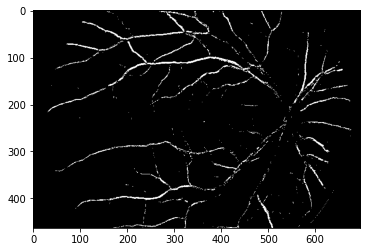

In [17]:
plt.imshow(res, cmap="gray")